<a href="https://colab.research.google.com/github/hamagami/is2024/blob/main/08_kmeans_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-means scratch

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:

# Define the KMeans class
class KMeans:
    def __init__(self, n_clusters=3, max_iter=10, tol=1e-4, random_state=None):
        """
        Initialize K-means parameters.
        - n_clusters: Number of clusters
        - max_iter: Maximum number of iterations
        - tol: Convergence threshold
        - random_state: Random seed
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.centroids = None
        self.labels_ = None

    def fit(self, X):
        """
        Perform clustering on the input data X.
        - X: Input dataset (numpy.ndarray)
        """
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape

        # Step 1: Initialize centroids randomly
        random_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        self.centroids = X[random_indices]

        for iteration in range(self.max_iter):
            # Calculate distances and assign labels
            distances = self._calculate_distances(X, self.centroids)
            labels = np.argmin(distances, axis=1)

            # Visualize current iteration
            self._visualize_iteration(X, labels, iteration)

            # Update centroids
            new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(self.n_clusters)])

            # Check for convergence
            shift = np.linalg.norm(self.centroids - new_centroids, axis=None)
            self.centroids = new_centroids

            if shift <= self.tol:
                print(f"Converged at iteration {iteration + 1}")
                break

        self.labels_ = labels
        print("Final centroids:\n", self.centroids)

    def _calculate_distances(self, X, centroids):
        """
        Compute Euclidean distances between data points and centroids.
        """
        return np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)

    def _visualize_iteration(self, X, labels, iteration):
        """
        Visualize clustering results at each iteration.
        - X: Input data
        - labels: Cluster assignments
        - iteration: Current iteration number
        """
        plt.figure(figsize=(8, 6))
        for i in range(self.n_clusters):
            plt.scatter(X[labels == i, 0], X[labels == i, 1], label=f'Cluster {i + 1}')
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
        plt.title(f'K-means Iteration {iteration + 1}')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.show()

In [9]:

# Generate synthetic data for clustering
def generate_data():
    """
    Generate synthetic data with three clusters for demonstration.
    """
    np.random.seed(42)
    cluster1 = np.random.normal(0, 1, (100, 2))
    cluster2 = np.random.normal(5, 1, (100, 2))
    cluster3 = np.random.normal(10, 1, (100, 2))
    data = np.vstack((cluster1, cluster2, cluster3))
    return data

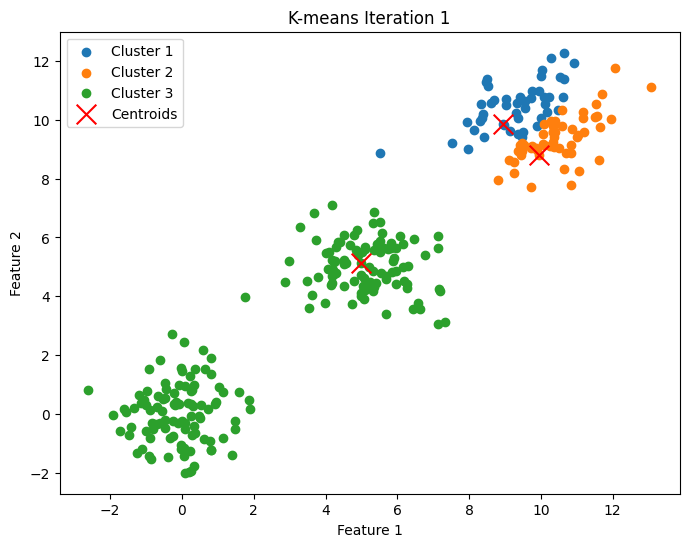

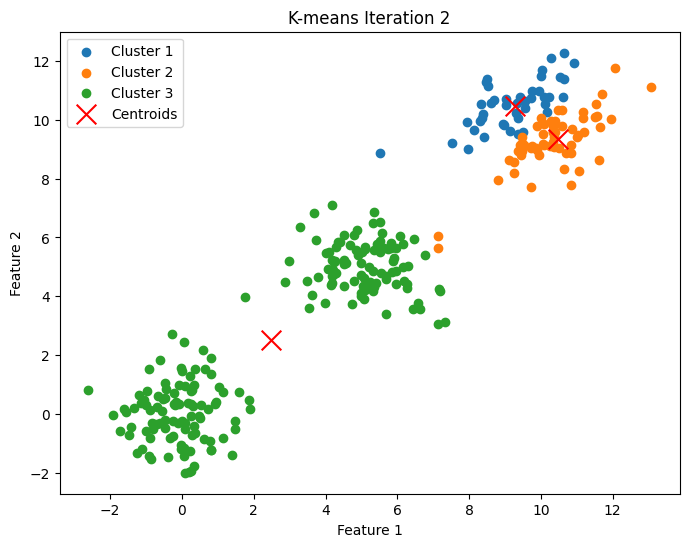

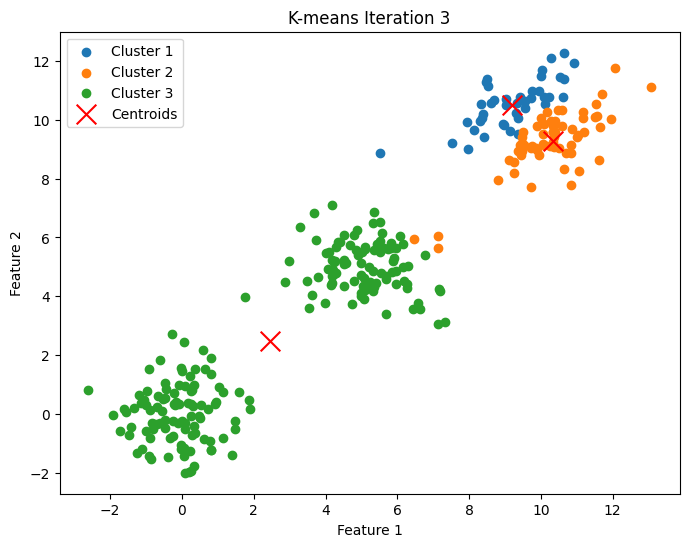

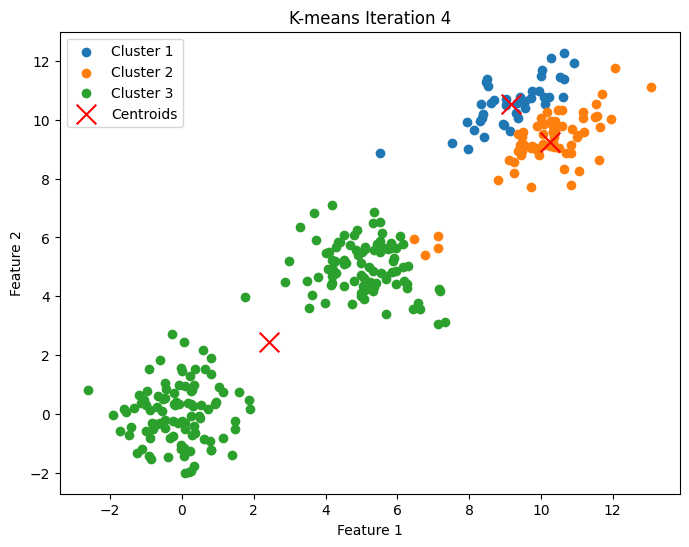

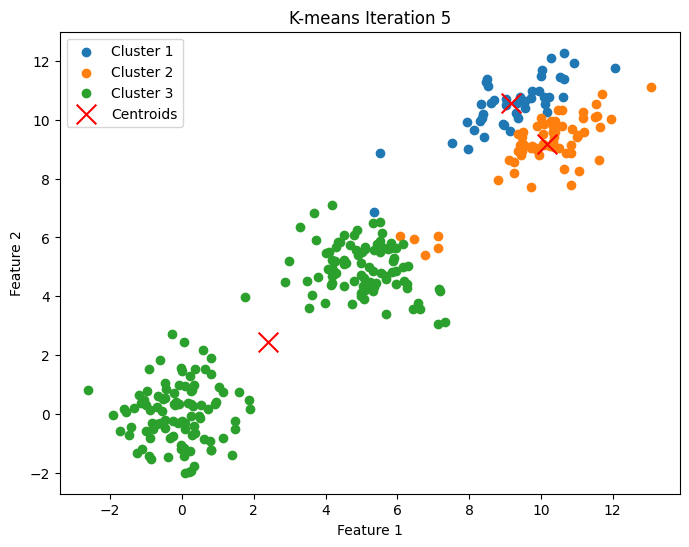

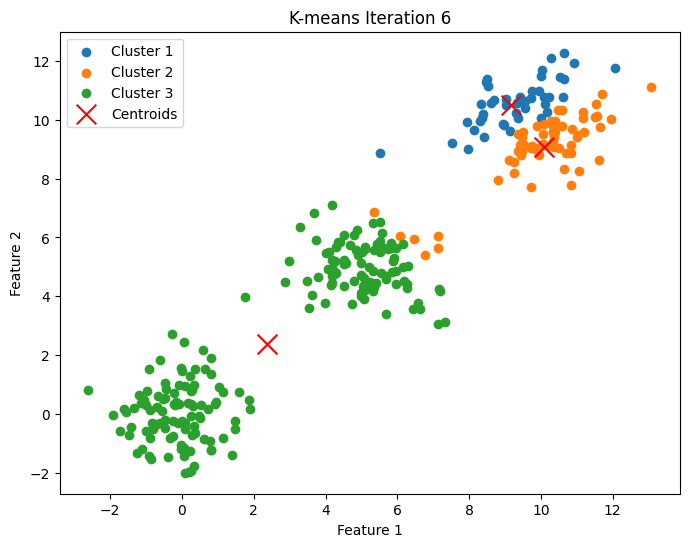

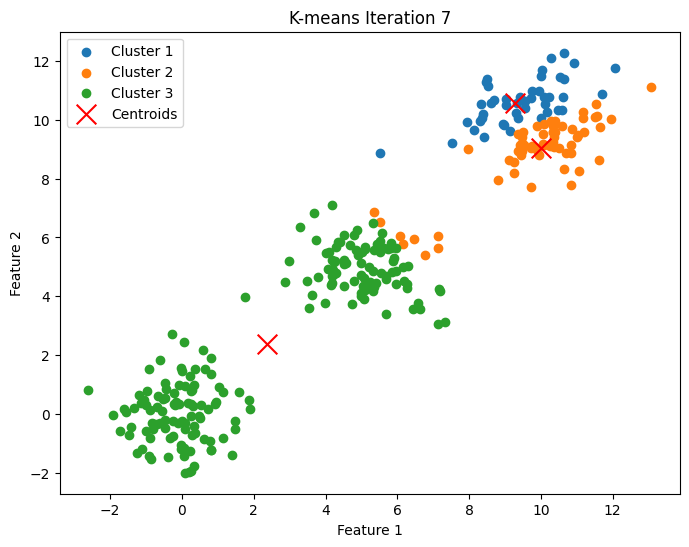

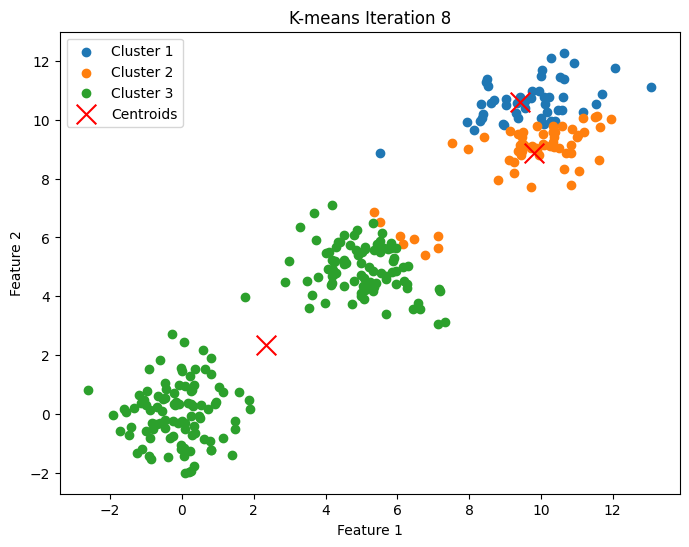

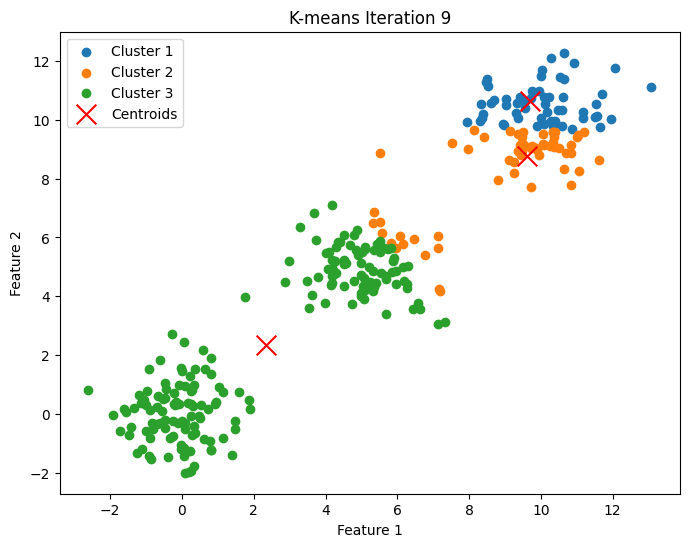

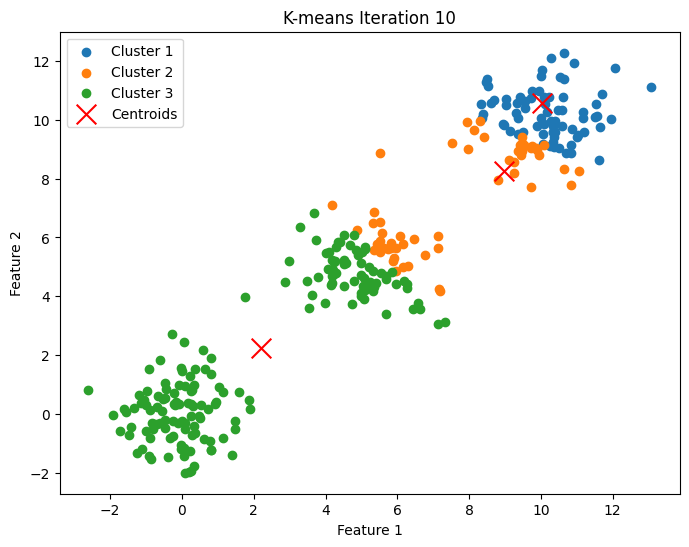

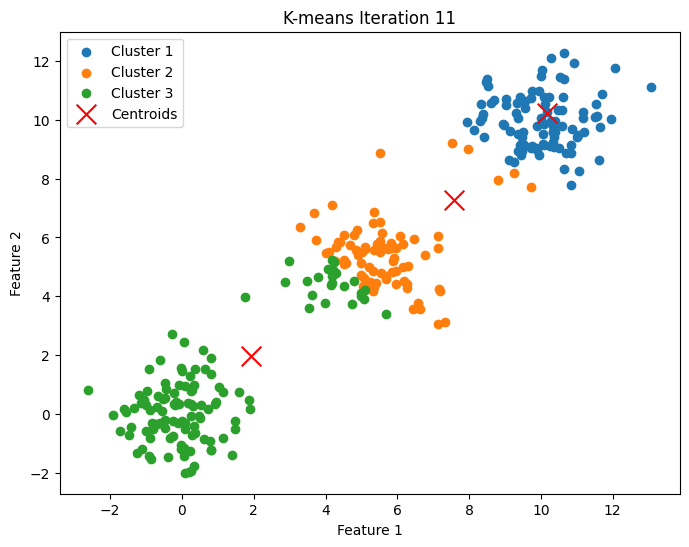

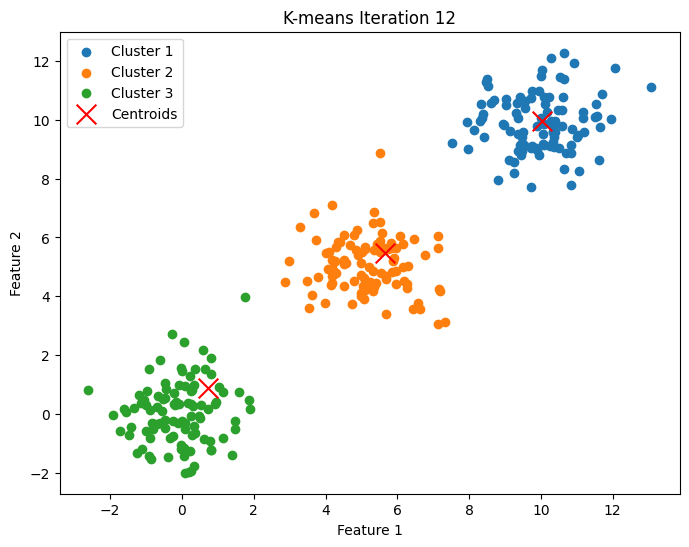

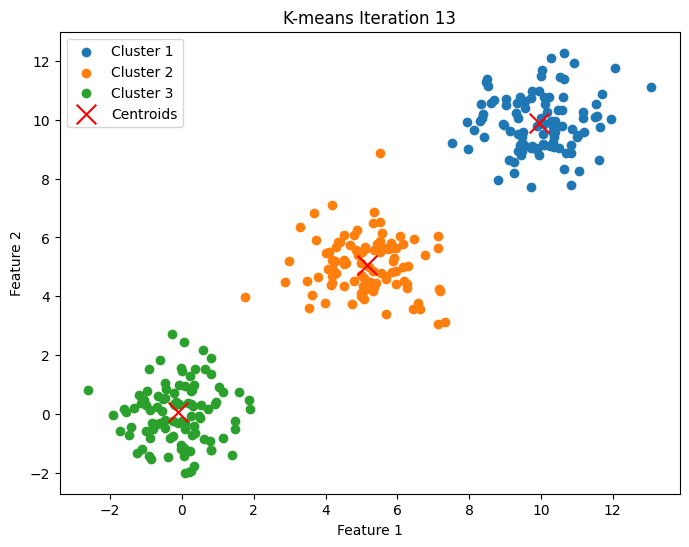

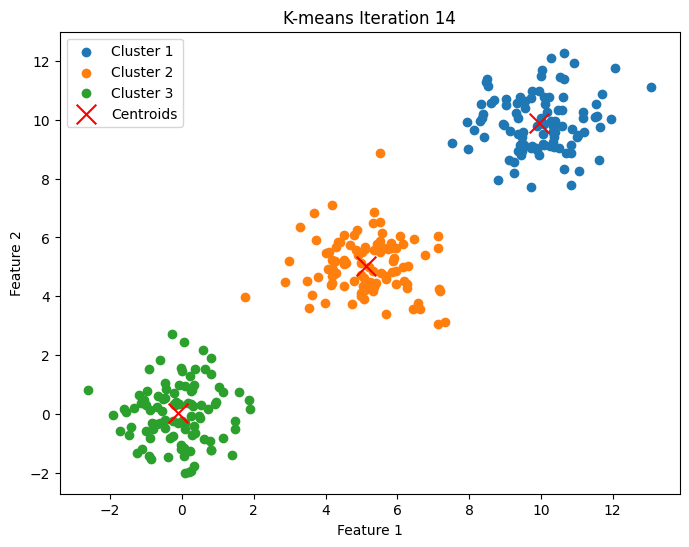

Converged at iteration 14
Final centroids:
 [[ 9.95496261  9.87372732]
 [ 5.12824872  5.04348765]
 [-0.11556425  0.03402232]]


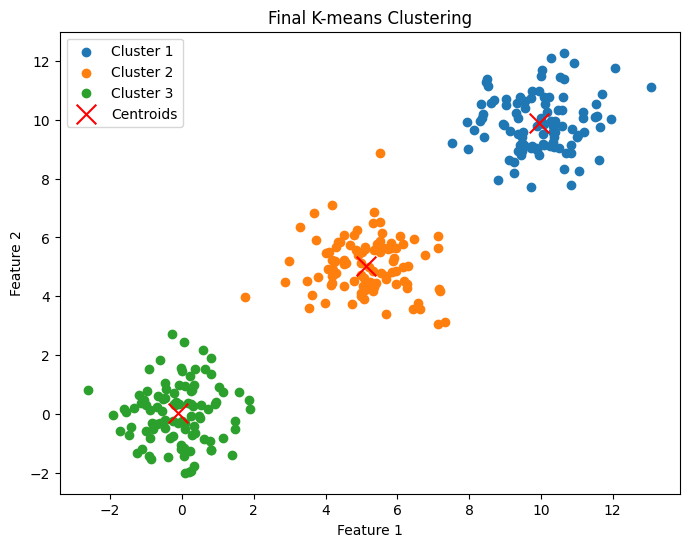

In [12]:
# Main execution
if __name__ == "__main__":
    # Step 1: Generate synthetic data
    data = generate_data()

    # Step 2: Run KMeans with visualization of intermediate steps
    kmeans = KMeans(n_clusters=3, max_iter=30, random_state=42)
    kmeans.fit(data)

    # Final Result Visualization
    plt.figure(figsize=(8, 6))
    for i in range(kmeans.n_clusters):
        plt.scatter(data[kmeans.labels_ == i, 0], data[kmeans.labels_ == i, 1], label=f'Cluster {i + 1}')
    plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
    plt.title("Final K-means Clustering")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()